In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [2]:
df = pd.read_csv('Raw_Housing_Prices3.csv')
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [4]:
sum(df.isnull().sum())

0

* No null values here.

# Feature Engineering :

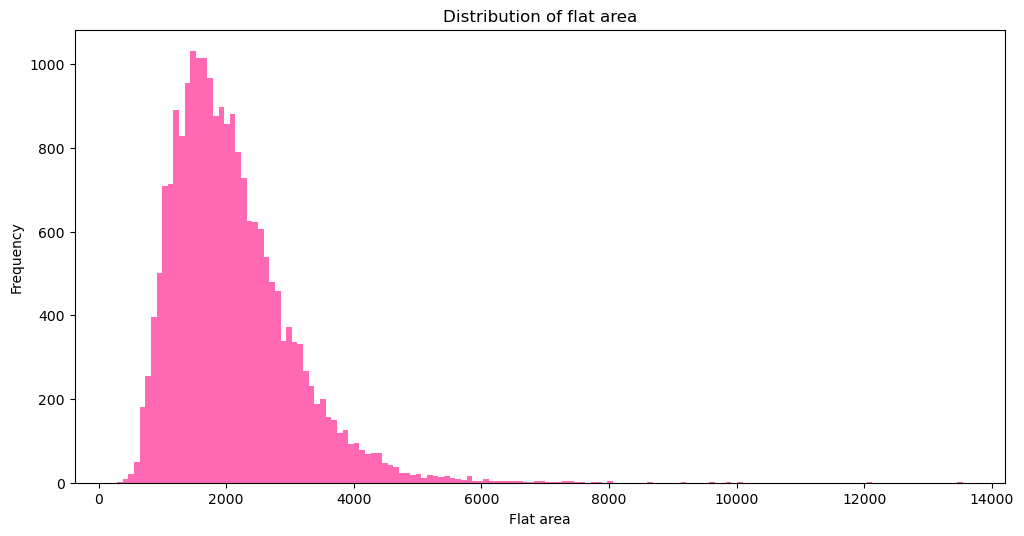

In [5]:
plt.figure(figsize = (12, 6), dpi = 100)
plt.hist(df['Flat Area (in Sqft)'], bins = 150, color = 'hotpink')
plt.xlabel('Flat area')
plt.ylabel('Frequency')
plt.title('Distribution of flat area')
plt.show()

* The data is right skewed.
* Hump or the peak is on the left side so its right skewed or positive skewed.



* __Normalize the data__ : taking log 

In [6]:
def log_transform(sample_data):
    return np.log(sample_data)

# This defined fuction takes some sample data and returns the log of it.

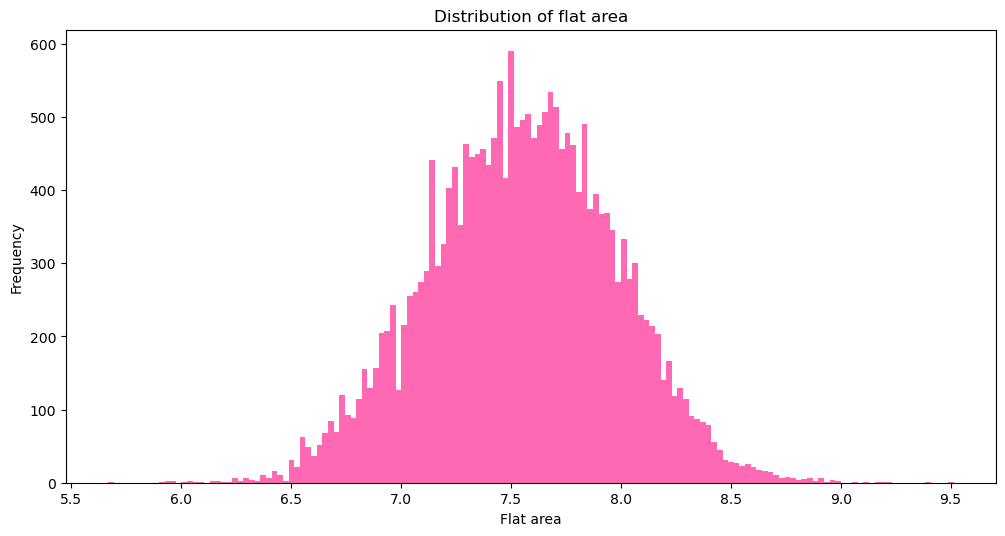

In [7]:
df['Transformed flat area'] = df['Flat Area (in Sqft)'].map(log_transform)

plt.figure(figsize = (12, 6), dpi = 100)
plt.hist(df['Transformed flat area'], bins = 150, color = 'hotpink')
plt.xlabel('Flat area')
plt.ylabel('Frequency')
plt.title('Distribution of flat area')
plt.show()

* Now the data looks Normaly Distributed.



# Feature Transformation : Categorical Encoding

In [8]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Transformed flat area
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,7.073270
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,7.851661
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,6.646391
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,7.580700
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,7.426549


In [9]:
label_encoded = df['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [10]:
label_encoded = label_encoded.map({'Bad':1, 'Okay':2, 'Fair':3, 'Good':4, 'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

### Binning :



> * It is the process of aggregating the data points in different categories to reduce the __redundancy.__
> * Binning not only helps in reducing the redundancy but also Carries out __One-Hot-Encoding__ or creating the dummy variables.
> * Works both on Numerical data and Categorical data as well.


> * Bad and Okay has occured very few number of times compared with others, so it would be good if we bin them.
> * First look at the bar graph of the __Condition of the House__ and corresponding __mean sales__ price.

In [11]:
mean = []

for i in df['Condition of the House'].unique():
    mean.append(df['Sale Price'][df['Condition of the House'] == i].mean())

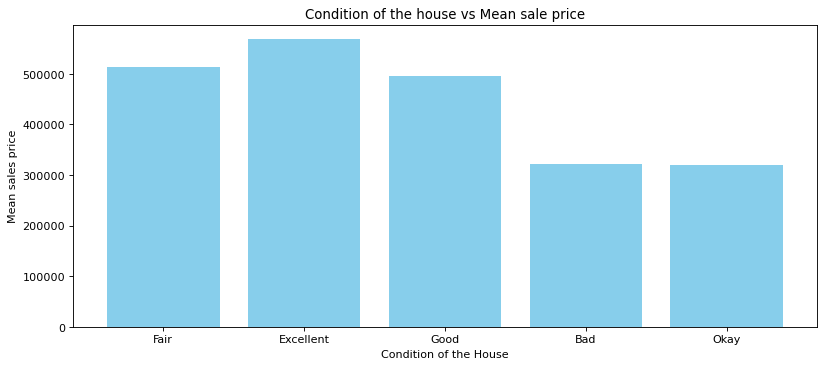

In [12]:
plt.figure(figsize = (12, 5), dpi = 80)
plt.bar(df['Condition of the House'].unique(), mean, color = 'skyblue')
plt.xlabel('Condition of the House')
plt.ylabel('Mean sales price')
plt.title('Condition of the house vs Mean sale price')
plt.show()

### Note :

* Here __Bad, Okay__ are very similar with each other in terms of mean sales price and same goes with __Fair__ and __Good.__
* We can reduce the number of bars to $3$, since the mentioned bars are very similar(represents same numbers).

In [13]:
mapping = {'Excellent':'Excellent', 
          'Fair':'Good',
          'Good':'Good',
          'Okay':'Okay',
          'Bad':'Okay'}
df['Condition of the House'] = df['Condition of the House'].map(mapping)

In [14]:
mean = []

for i in df['Condition of the House'].unique():
    mean.append(df['Sale Price'][df['Condition of the House'] == i].mean())

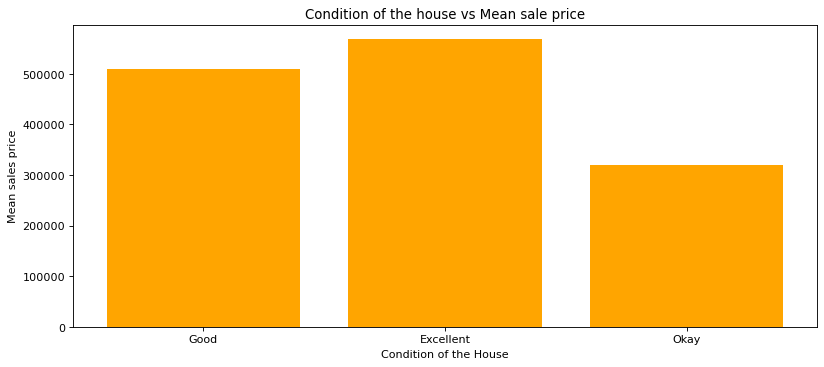

In [15]:
plt.figure(figsize = (12, 5), dpi = 80)
plt.bar(df['Condition of the House'].unique(), mean, color = 'orange')
plt.xlabel('Condition of the House')
plt.ylabel('Mean sales price')
plt.title('Condition of the house vs Mean sale price')
plt.show()

### Question :


> * Will there be any substantial difference between the selling price of a house which is __40 years__ old and the selling price of __42 years__ old house ? Given that all the features are exactly same.
> * The answer is __NO__.


### Explanation :
> * A 40 year old house and 42 year old house will have very negligible difference in their selling prices or most probably may have __NO__ difference.
> * So to reduce this redundancy we will use Binning on this Continuous data.


In [16]:
df['Age of House (in Years)'].describe()

count    21609.000000
mean        46.999722
std         29.373317
min          3.000000
25%         21.000000
50%         43.000000
75%         67.000000
max        118.000000
Name: Age of House (in Years), dtype: float64

In [17]:
len(df['Age of House (in Years)'].unique())

116

### Note :


 * If the age < 10 : The house is __New.__
 * If the 10 < age < 50 : The house is __Old.__
 * Else the house is __Very Old__.

In [18]:
def age_of_house(x):
    if x < 10:
        x = 'new'
    elif x < 50:
        x = 'old'
    else :
        x = 'very old'
    return x

In [19]:
cat_house_age = df['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

### Note :

* Binning a continuous variable may result in increase in dimensionality of the dataset.
* Perform binning only and only when there's a valid reason to perform.

# Feature Generation


 ### 1. Feature Extraction : 
 
 * Extracting the information from the original features.
 * Extracted features contains information in simpler form.
 * Helps increasing the model performance.

In [20]:
df['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [21]:
time = pd.DatetimeIndex(df['Date House was Sold'])
df['year_sold'] = time.year
df['month_sold'] = time.month
df['weekday_sold'] = time.day_name()
df['date_sold'] = time.days_in_month

df[['year_sold', 'month_sold', 'weekday_sold', 'date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29


### Question :

> * How is weekday important to our dataset ?

### Explanation :

> * Actually it is not in our particular example.
> * But it plays very import role in problems such as __Traffic, Food stock demand predictions__ etc.

In [22]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Transformed flat area,year_sold,month_sold,weekday_sold,date_sold
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,98178.0,47.5112,-122.257,1340.0,5650,7.073270,2017,10,Saturday,31
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,98125.0,47.7210,-122.319,1690.0,7639,7.851661,2017,12,Thursday,31
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,98028.0,47.7379,-122.233,2720.0,8062,6.646391,2016,2,Monday,29
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,98136.0,47.5208,-122.393,1360.0,5000,7.580700,2017,12,Thursday,31
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,98074.0,47.6168,-122.045,1800.0,7503,7.426549,2016,2,Monday,29


In [24]:
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Transformed flat area',
       'year_sold', 'month_sold', 'weekday_sold', 'date_sold'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House